In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-predictions-personal/Churn_Predictions.csv


In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

# Splitting data into training and testing
from sklearn.model_selection import train_test_split,cross_val_score
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

#Sklearn Models
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay,classification_report
import math
import xgboost as xgb
import lightgbm as lgb
from imblearn.over_sampling import SMOTE

In [3]:
df =pd.read_csv("/kaggle/input/churn-predictions-personal/Churn_Predictions.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.describe(include=['O'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [8]:
#check for duplicates
df.duplicated().any()

False

In [9]:
#check for missing values 
df.isnull().sum().sum()

0

<AxesSubplot:xlabel='Exited', ylabel='count'>

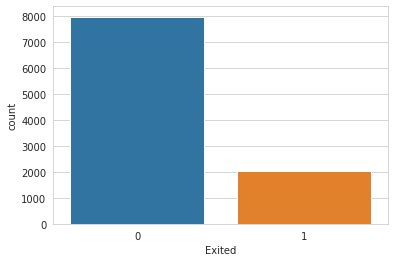

In [10]:
#Univariate analysis
sns.set_style('whitegrid')
sns.countplot(df['Exited'])

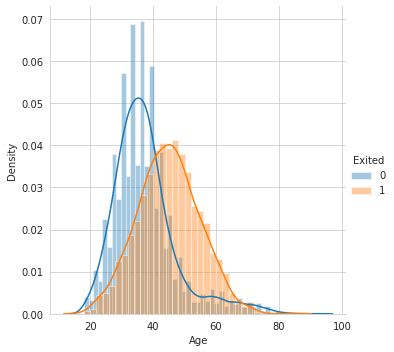

In [11]:
sns.FacetGrid(df,hue="Exited",size=5).map(sns.distplot,"Age").add_legend()

<AxesSubplot:xlabel='Geography', ylabel='count'>

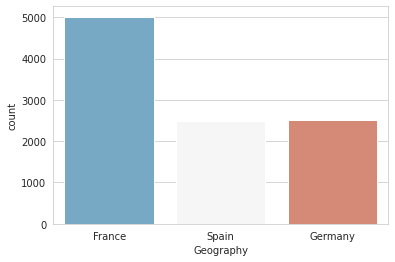

In [12]:
sns.countplot(x='Geography',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Geography', ylabel='count'>

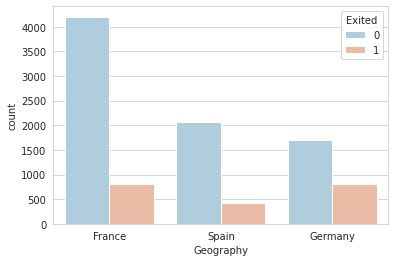

In [13]:
sns.countplot(x='Geography',hue='Exited',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Gender', ylabel='count'>

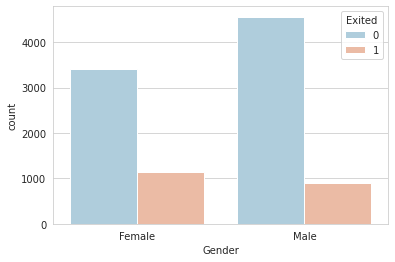

In [14]:
sns.countplot(x='Gender',hue='Exited',data=df,palette='RdBu_r')

<AxesSubplot:>

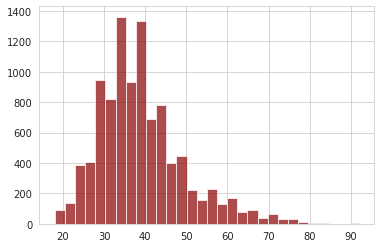

In [15]:
df['Age'].hist(bins=30,color='darkred',alpha=0.7)

<AxesSubplot:>

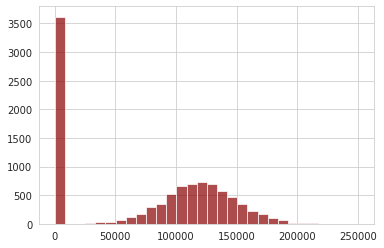

In [16]:
df['Balance'].hist(bins=30,color='darkred',alpha=0.7)

<AxesSubplot:>

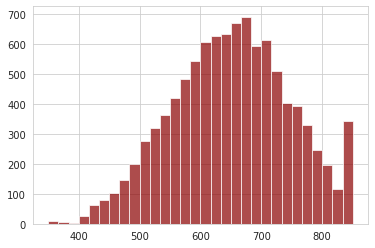

In [17]:
df['CreditScore'].hist(bins=30,color='darkred',alpha=0.7)

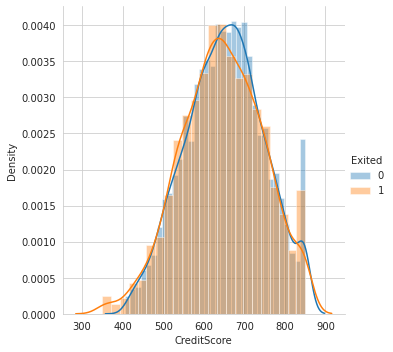

In [18]:
sns.FacetGrid(df,hue="Exited",size=5).map(sns.distplot,"CreditScore").add_legend()

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

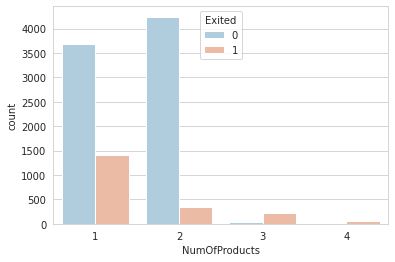

In [19]:
sns.countplot(x='NumOfProducts',hue='Exited',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

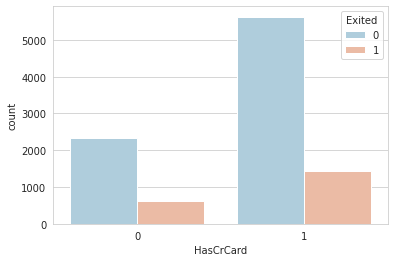

In [20]:
sns.countplot(x='HasCrCard',hue='Exited',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

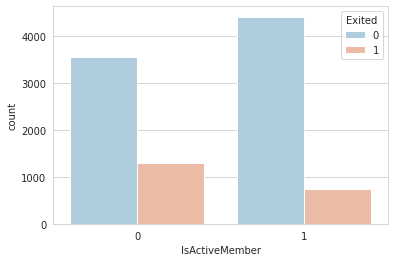

In [21]:
sns.countplot(x='IsActiveMember',hue='Exited',data=df,palette='RdBu_r')

In [22]:
#Age bins
df['Age_bins'] = pd.cut(df['Age'], bins=3,
                      labels=['Young', 'Adult', 'Elderly'])

<AxesSubplot:xlabel='Age_bins', ylabel='count'>

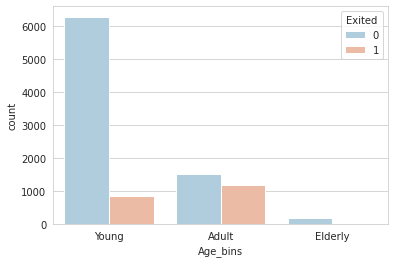

In [23]:
sns.countplot(x='Age_bins',hue='Exited',data=df,palette='RdBu_r')

In [24]:
df.groupby("NumOfProducts").agg({"Exited":"count"})

,Exited
NumOfProducts,
1,5084
2,4590
3,266
4,60


In [25]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Age_bins'],
      dtype='object')

In [26]:
#cleaning our data
cleanDf = df.drop(['RowNumber', 'CustomerId'],axis=1)
cleanDf.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bins
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Young
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Young
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Young
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Young
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Adult


In [27]:
cleanDf.dtypes

Surname              object
CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
Age_bins           category
dtype: object

In [28]:
cleanDf['Surname'] = pd.factorize(cleanDf['Surname'])[0]
cleanDf['Geography'] =pd.factorize(cleanDf['Geography'])[0]
cleanDf['Gender'] =pd.factorize(cleanDf['Gender'])[0]
cleanDf['Age_bins']=pd.factorize(cleanDf['Age_bins'])[0]


cleanDf.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bins
0,0,619,0,0,42,2,0.00,1,1,1,101348.88,1,0
1,1,608,1,0,41,1,83807.86,1,0,1,112542.58,0,0
2,2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,0
3,3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0
4,4,850,1,0,43,2,125510.82,1,1,1,79084.10,0,1


In [29]:
#Modelling
y=cleanDf["Exited"]
X= cleanDf.drop(['Exited'],axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=34)

In [30]:
#RandomForest
rf = RandomForestClassifier().fit(X_train,y_train)
y_pred = rf.predict(X_test)

cv_results = cross_val_score(rf, X_train, y_train, cv = 10, scoring= "accuracy")

print(cv_results.mean())
print("Accuracy score is ",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.862125
Accuracy score is  0.861
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1566
           1       0.79      0.49      0.60       434

    accuracy                           0.86      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



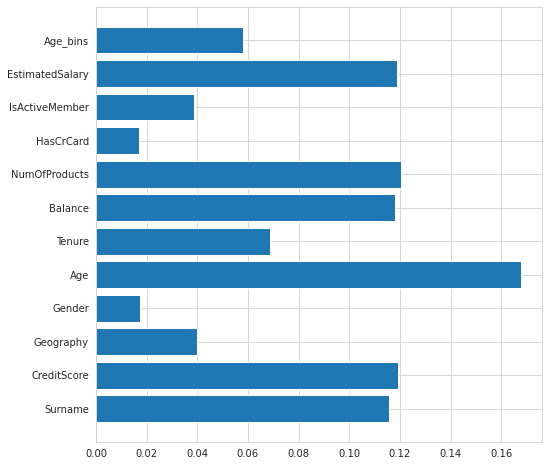

In [31]:
#plotting feature importances
importance=rf.feature_importances_
plt.figure(figsize=(8,8))
plt.barh(X.columns,importance)
plt.show()

In [32]:
#Gradient Boosting
gbm_model=GradientBoostingClassifier().fit(X_train,y_train)
y_pred = gbm_model.predict(X_test)

cv_results = cross_val_score(gbm_model, X_train, y_train, cv = 10, scoring= "accuracy")

print(cv_results.mean())
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8627499999999999
0.8615
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1566
           1       0.79      0.49      0.61       434

    accuracy                           0.86      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [33]:
#LightGBM
lgbm_model=lgb.LGBMClassifier().fit(X_train,y_train)
y_pred = lgbm_model.predict(X_test)

cv_results = cross_val_score(lgbm_model, X_train, y_train, cv = 10, scoring= "accuracy")

print(cv_results.mean())
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.859625
0.8615
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1566
           1       0.78      0.51      0.61       434

    accuracy                           0.86      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [34]:
# model tuning
#SMOTE
smt = SMOTE(random_state=15)
X_res, y_res = smt.fit_resample(X, y)


In [35]:
#LGBMClassifier
#split işlemi
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, 
                                                    test_size=0.20, 
                                                    random_state=15)


lgbm_model=lgb.LGBMClassifier(random_state=15).fit(X_train,y_train)
y_pred = lgbm_model.predict(X_test)

cv_results = cross_val_score(lgbm_model, X_train,y_train, cv = 10, scoring= "accuracy")

print("cross_val_score(train):", cv_results.mean())

cv_results = cross_val_score(lgbm_model, X_test,y_test, cv = 10, scoring= "accuracy")
print("cross_val_score(test):", cv_results.mean())


y_train_pred = lgbm_model.predict(X_train)
print("accuracy_score(train):",accuracy_score(y_train, y_train_pred))
print("accuracy_score(test):",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cross_val_score(train): 0.8474097331240188
cross_val_score(test): 0.8383559078093887
accuracy_score(train): 0.8983516483516484
accuracy_score(test): 0.8640929064657878
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1632
           1       0.86      0.86      0.86      1554

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



[[1411  221]
 [ 212 1342]]


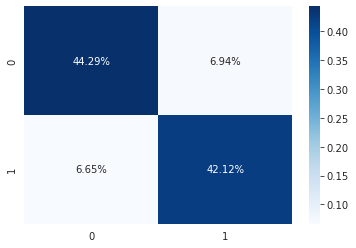

In [36]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues');